#Preparation and Cleaning

In [1]:
from google.colab import files
uploaded = files.upload()

Saving imdb.csv to imdb (1).csv


In [2]:
import pandas as pd
df = pd.read_csv("imdb.csv")
print(df.head())  # To display the first few rows

                                         Poster_Link  \
0  https://m.media-amazon.com/images/M/MV5BMDFkYT...   
1  https://m.media-amazon.com/images/M/MV5BM2MyNj...   
2  https://m.media-amazon.com/images/M/MV5BMTMxNT...   
3  https://m.media-amazon.com/images/M/MV5BMWMwMG...   
4  https://m.media-amazon.com/images/M/MV5BMWU4N2...   

               Series_Title Released_Year Certificate  Runtime  \
0  The Shawshank Redemption          1994           A  142 min   
1             The Godfather          1972           A  175 min   
2           The Dark Knight          2008          UA  152 min   
3    The Godfather: Part II          1974           A  202 min   
4              12 Angry Men          1957           U   96 min   

                  Genre  IMDB_Rating  \
0                 Drama          9.3   
1          Crime, Drama          9.2   
2  Action, Crime, Drama          9.0   
3          Crime, Drama          9.0   
4          Crime, Drama          9.0   

                         

In [3]:
# Import Libraries
import pandas as pd
import numpy as np
import scipy.stats as st
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# Data
data = pd.read_csv("imdb.csv")
data.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


In [7]:
# Pick some variables
df = data[["IMDB_Rating", "Released_Year", "Runtime", "Meta_score", "Gross", "Director"]]
df.head()

,IMDB_Rating,Released_Year,Runtime,Meta_score,Gross,Director
0,9.3,1994,142 min,80.0,"28,341,469",Frank Darabont
1,9.2,1972,175 min,100.0,"134,966,411",Francis Ford Coppola
2,9.0,2008,152 min,84.0,"534,858,444",Christopher Nolan
3,9.0,1974,202 min,90.0,"57,300,000",Francis Ford Coppola
4,9.0,1957,96 min,96.0,"4,360,000",Sidney Lumet


In [8]:
# Look at the df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   IMDB_Rating    1000 non-null   float64
 1   Released_Year  1000 non-null   object 
 2   Runtime        1000 non-null   object 
 3   Meta_score     843 non-null    float64
 4   Gross          831 non-null    object 
 5   Director       1000 non-null   object 
dtypes: float64(2), object(4)
memory usage: 47.0+ KB


In [11]:
# Convert Released_Year to numeric
df["Released_Year"] = pd.to_numeric(df["Released_Year"], errors="coerce")

<ipython-input-11-e7965c2045e8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Released_Year"] = pd.to_numeric(df["Released_Year"], errors="coerce")


In [12]:
# Check Row 966
df.iloc[966]

,966
IMDB_Rating,7.6
Released_Year,NaN
Runtime,140 min
Meta_score,77.0
Gross,"173,837,933"
Director,Ron Howard


In [17]:
# Create a decade variable
df["decade"] = np.floor(df["Released_Year"] / 10) * 10

<ipython-input-17-38619354f047>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["decade"] = np.floor(df["Released_Year"] / 10) * 10


In [38]:
# Convert and transform Runtime
df['Runtime'] = df['Runtime'] = df['Runtime'].astype(str).str.replace(" min", "").astype(int)

<ipython-input-38-717c78ec1609>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Runtime'] = df['Runtime'] = df['Runtime'].astype(str).str.replace(" min", "").astype(int)


In [40]:
# Fil NaN values with zero
df['Gross'] = df['Gross'].fillna(0)
print(df['Gross'].isna().sum())

0


<ipython-input-40-ac51f988fabc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Gross'] = df['Gross'].fillna(0)


In [42]:
# Convert and transform the Gross Variables
df['Gross'] = df['Gross'].str.replace(",", "").fillna(0).astype(int)


<ipython-input-42-ea07d2f113c7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Gross'] = df['Gross'].str.replace(",", "").fillna(0).astype(int)


In [45]:
# Creating a mil variable for Gross
df['Gross_mil'] = df['Gross'] / 1000000

<ipython-input-45-032d49f33fe5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Gross_mil'] = df['Gross'] / 1000000


In [47]:
# Finalize this df
df.drop(columns= ['Released_Year', 'Gross'])
df.head()

,IMDB_Rating,Released_Year,Runtime,Meta_score,Gross,Director,decade,Gross_mil
0,9.3,1994.0,142,80.0,28341469,Frank Darabont,1990.0,28.341469
1,9.2,1972.0,175,100.0,134966411,Francis Ford Coppola,1970.0,134.966411
2,9.0,2008.0,152,84.0,534858444,Christopher Nolan,2000.0,534.858444
3,9.0,1974.0,202,90.0,57300000,Francis Ford Coppola,1970.0,57.300000
4,9.0,1957.0,96,96.0,4360000,Sidney Lumet,1950.0,4.360000


#Exploratory Data Analysis

In [48]:
# Summary Statistics
df.describe()

,IMDB_Rating,Released_Year,Runtime,Meta_score,Gross,decade,Gross_mil
count,1000.000000,999.000000,1000.000000,843.000000,1.000000e+03,999.000000,1000.000000
mean,7.949300,1991.217217,122.891000,77.971530,5.653688e+07,1986.586587,56.536878
std,0.275491,23.297025,28.093671,12.376099,1.032382e+08,23.189130,103.238179
min,7.600000,1920.000000,45.000000,28.000000,0.000000e+00,1920.000000,0.000000
25%,7.700000,1976.000000,103.000000,70.000000,4.457098e+05,1970.000000,0.445710
50%,7.900000,1999.000000,119.000000,79.000000,1.070275e+07,1990.000000,10.702751
75%,8.100000,2009.000000,137.000000,87.000000,6.153989e+07,2000.000000,61.539891
max,9.300000,2020.000000,321.000000,100.000000,9.366622e+08,2020.000000,936.662225


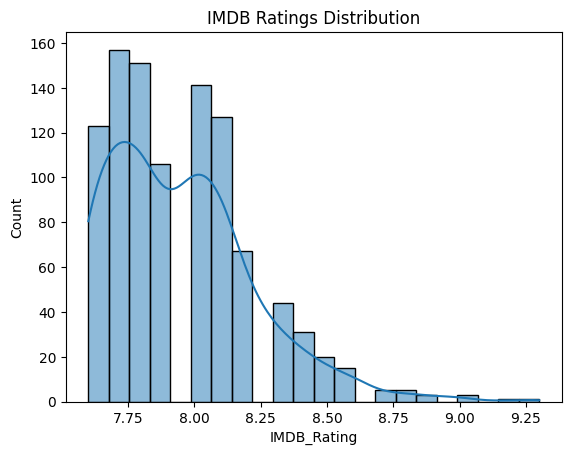

In [52]:
# Histogram of the IMDB ratings
sns.histplot(df['IMDB_Rating'], kde = True)
plt.title('IMDB Ratings Distribution')
plt.show()

In [60]:
# Study the top 10 directors with the highest avg IMDB rating
director_ratings = (df.groupby('Director')['IMDB_Rating']
                    .mean(10)
                    .sort_values(ascending = False)
                    .head(10))
director_ratings

,IMDB_Rating
Director,
Frank Darabont,8.95
Irvin Kershner,8.70
Lana Wachowski,8.70
George Lucas,8.60
Roberto Benigni,8.60
Masaki Kobayashi,8.60
Thomas Kail,8.60
Sudha Kongara,8.60
Fernando Meirelles,8.60


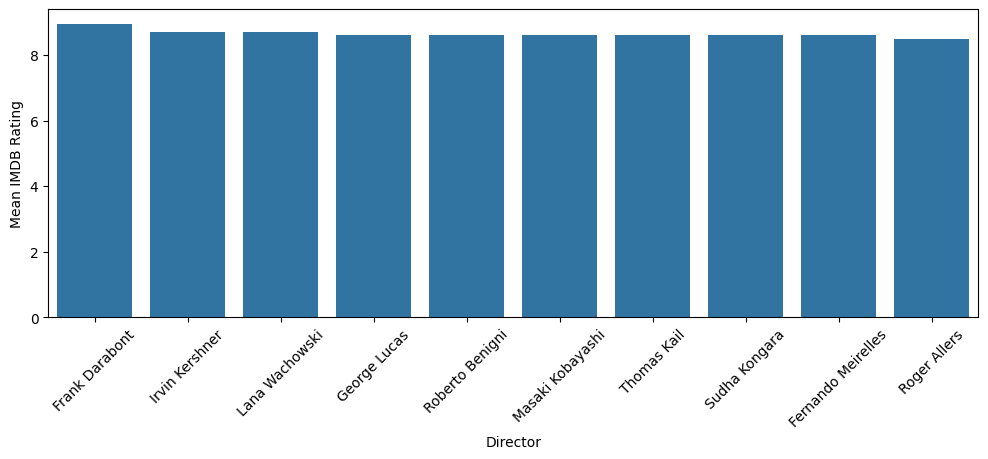

In [65]:
# Visualize the Mean IMDB ratings for the top 10 directors
plt.figure(figsize = (12, 4))
sns.barplot(x = director_ratings.index,
            y = director_ratings.values)
plt.xlabel('Director')
plt.ylabel('Mean IMDB Rating')
plt.xticks(rotation = 45)
plt.show()


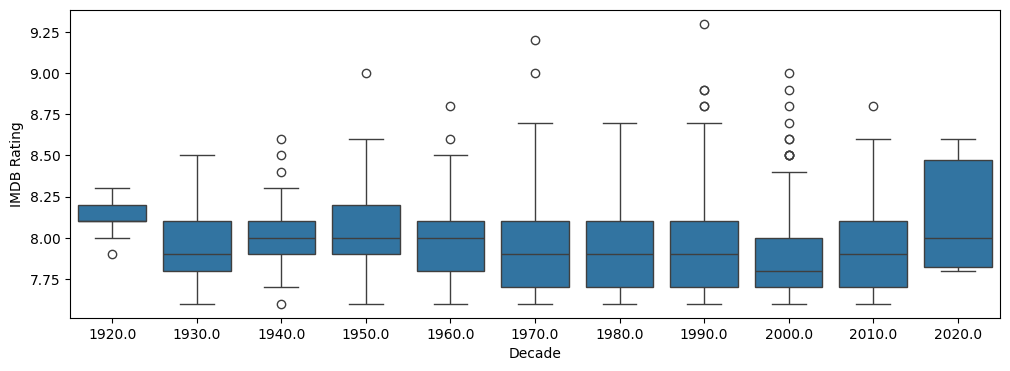

In [70]:
# Distribution of IMDB ratings by decade
plt.figure(figsize = (12, 4))
sns.boxplot(x = 'decade', y = 'IMDB_Rating', data = df)
plt.xlabel('Decade')
plt.ylabel('IMDB Rating')
plt.show()

In [71]:
# Covariance matrix
df_co = df[["Runtime", "IMDB_Rating", "Gross_mil", "Meta_score"]]
df_co.cov()

,Runtime,IMDB_Rating,Gross_mil,Meta_score
Runtime,789.254373,1.881455,417.438934,-10.526302
IMDB_Rating,1.881455,0.075895,2.343023,0.942946
Gross_mil,417.438934,2.343023,10658.121703,-72.676259
Meta_score,-10.526302,0.942946,-72.676259,153.167835


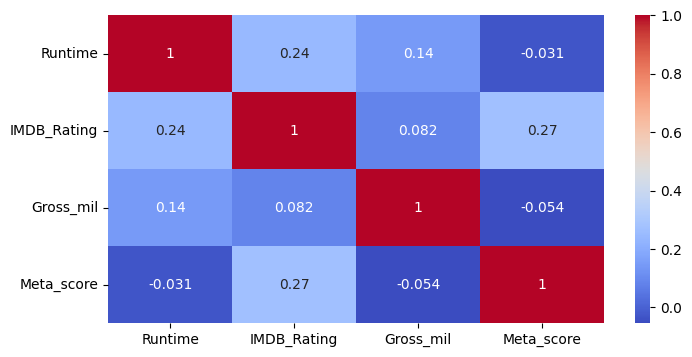

In [74]:
# Correlation Heatmap
plt.figure(figsize = (8, 4))
sns.heatmap(df_co.corr(), annot = True, cmap = 'coolwarm')
plt.show()

#Estimating Average Ratings

In [78]:
# Calculate the Mean, the standard deviation, and the sample size
summary = df.groupby('decade').agg({'Gross_mil': ['mean', 'std', 'count']})

In [79]:
# Rename the columns
summary.columns = ['Gross_mean' , 'Gross_std', 'Gross_count']

In [80]:
# Calculate the Standard Error of the Mean (SEM) for the Gross column
summary['Gross_sem'] = summary['Gross_std'] / np.sqrt(summary['Gross_count'])
summary.head()

,Gross_mean,Gross_std,Gross_count,Gross_sem
decade,,,,
1920.0,1.341802,2.084388,11,0.628467
1930.0,9.968549,40.300467,24,8.226298
1940.0,4.739121,13.376285,35,2.261005
1950.0,7.846706,17.703398,56,2.365716
1960.0,21.234302,35.304236,73,4.132048


In [81]:
# Calculate the t-score for a 95% confidence level
alpha = 0.05
summary['tscore'] = st.t.ppf(1- alpha/2,
                             summary['Gross_count'] - 1)

# Calculate the lower and upper bounds of the 95% confidence interval for Gross
summary['lower_ci'] = summary['Gross_mean'] - summary['tscore'] * summary['Gross_sem']
summary['upper_ci'] = summary['Gross_mean'] + summary['tscore'] * summary['Gross_sem']

#Display outcome
summary

,Gross_mean,Gross_std,Gross_count,Gross_sem,tscore,lower_ci,upper_ci
decade,,,,,,,
1920.0,1.341802,2.084388,11,0.628467,2.228139,-0.058509,2.742113
1930.0,9.968549,40.300467,24,8.226298,2.068658,-7.048845,26.985944
1940.0,4.739121,13.376285,35,2.261005,2.032245,0.144207,9.334036
1950.0,7.846706,17.703398,56,2.365716,2.004045,3.105705,12.587706
1960.0,21.234302,35.304236,73,4.132048,1.993464,12.997214,29.471390
1970.0,41.051211,61.715373,76,7.079239,1.992102,26.948645,55.153778
1980.0,56.013362,78.126921,89,8.281437,1.987290,39.555746,72.470978
1990.0,57.147999,92.390192,150,7.543628,1.976013,42.241692,72.054307
2000.0,63.191930,102.460660,237,6.655535,1.970067,50.080081,76.303779
